In [2]:

!pip install tensorflow  opencv-python matplotlib


In [3]:
import tensorflow as tf
import os

In [4]:
import cv2
import imghdr

In [14]:
data_dir = '/content/drive/MyDrive/image classification/data'

In [15]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [16]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

Image not in ext list /content/drive/MyDrive/image classification/data/happy/happy-people-having-fun-over-260nw-611293913.jpg
Image not in ext list /content/drive/MyDrive/image classification/data/happy/3BCckliche-menschen-konzept-gruppe-von-jugendlichen-auf-der-suche-nach-unten.jpg
Image not in ext list /content/drive/MyDrive/image classification/data/happy/o-HAPPY-facebook.jpg
Image not in ext list /content/drive/MyDrive/image classification/data/happy/group-happy-people-isolated-over-600w-102307264.jpg
Image not in ext list /content/drive/MyDrive/image classification/data/happy/2560px-Happy_People.jpg
Image not in ext list /content/drive/MyDrive/image classification/data/happy/56f455011e0000b300705475.jpeg
Image not in ext list /content/drive/MyDrive/image classification/data/happy/Happy20People.jpg
Image not in ext list /content/drive/MyDrive/image classification/data/happy/guilherme-stecanella-375176-unsplash.jpg
Image not in ext list /content/drive/MyDrive/image classification/da

In [6]:
import numpy as np
from matplotlib import pyplot as plt

In [17]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/image classification/data')

Found 148 files belonging to 2 classes.


In [19]:
data_iterator = data.as_numpy_iterator()

In [21]:
batch = data_iterator.next()

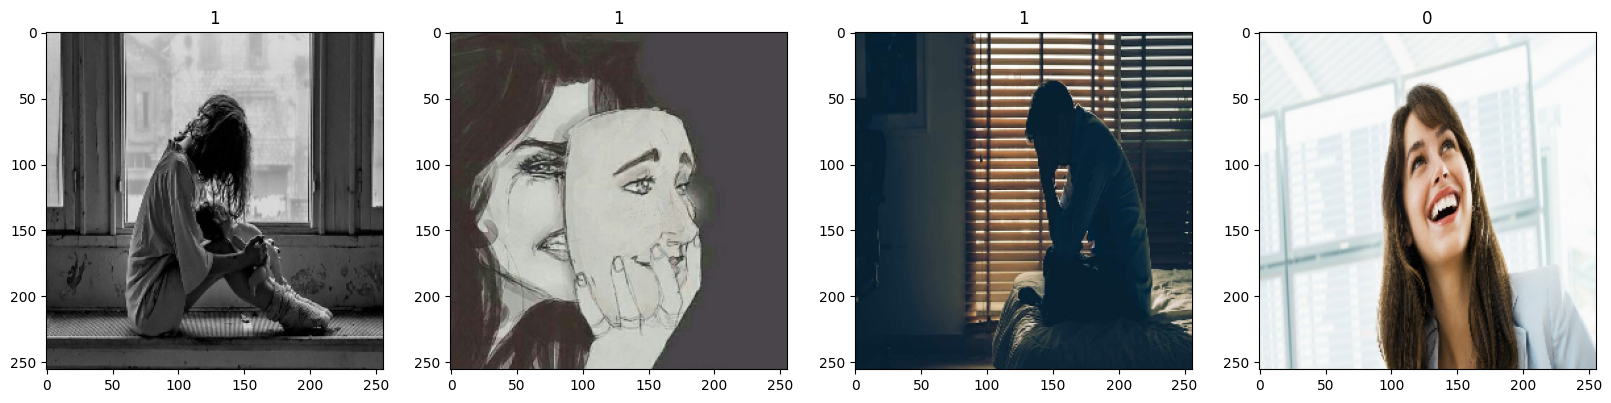

In [22]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [23]:
data = data.map(lambda x,y: (x/255, y))

In [24]:
data.as_numpy_iterator().next()


(array([[[[9.68627453e-01, 9.68627453e-01, 9.68627453e-01],
          [9.68627453e-01, 9.68627453e-01, 9.68627453e-01],
          [9.68627453e-01, 9.68627453e-01, 9.68627453e-01],
          ...,
          [9.68627453e-01, 9.68627453e-01, 9.68627453e-01],
          [9.68627453e-01, 9.68627453e-01, 9.68627453e-01],
          [9.68627453e-01, 9.68627453e-01, 9.68627453e-01]],
 
         [[9.68627453e-01, 9.68627453e-01, 9.68627453e-01],
          [9.68627453e-01, 9.68627453e-01, 9.68627453e-01],
          [9.68627453e-01, 9.68627453e-01, 9.68627453e-01],
          ...,
          [9.68627453e-01, 9.68627453e-01, 9.68627453e-01],
          [9.68627453e-01, 9.68627453e-01, 9.68627453e-01],
          [9.68627453e-01, 9.68627453e-01, 9.68627453e-01]],
 
         [[9.68627453e-01, 9.68627453e-01, 9.68627453e-01],
          [9.68627453e-01, 9.68627453e-01, 9.68627453e-01],
          [9.68627453e-01, 9.68627453e-01, 9.68627453e-01],
          ...,
          [9.68627453e-01, 9.68627453e-01, 9.6862

In [25]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [26]:
train_size

3

In [27]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [28]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


In [30]:
model = Sequential()


In [31]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [33]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [34]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [35]:
logdir='logs'


In [36]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [37]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/20
3/3 [==============================] - 15s 4s/step - loss: 1.6341 - accuracy: 0.5417 - val_loss: 1.1831 - val_accuracy: 0.4375
Epoch 2/20
3/3 [==============================] - 19s 7s/step - loss: 0.9556 - accuracy: 0.4896 - val_loss: 0.7317 - val_accuracy: 0.4375
Epoch 3/20
3/3 [==============================] - 15s 5s/step - loss: 0.7078 - accuracy: 0.5000 - val_loss: 0.6819 - val_accuracy: 0.6562
Epoch 4/20
3/3 [==============================] - 14s 4s/step - loss: 0.6781 - accuracy: 0.7500 - val_loss: 0.6612 - val_accuracy: 0.7500
Epoch 5/20
3/3 [==============================] - 20s 4s/step - loss: 0.6524 - accuracy: 0.6354 - val_loss: 0.5002 - val_accuracy: 0.8438
Epoch 6/20
3/3 [==============================] - 15s 4s/step - loss: 0.6015 - accuracy: 0.7292 - val_loss: 0.4313 - val_accuracy: 0.8438
Epoch 7/20
3/3 [==============================] - 15s 4s/step - loss: 0.5670 - accuracy: 0.6562 - val_loss: 0.4547 - val_accuracy: 0.8750
Epoch 8/20
3/3 [==================

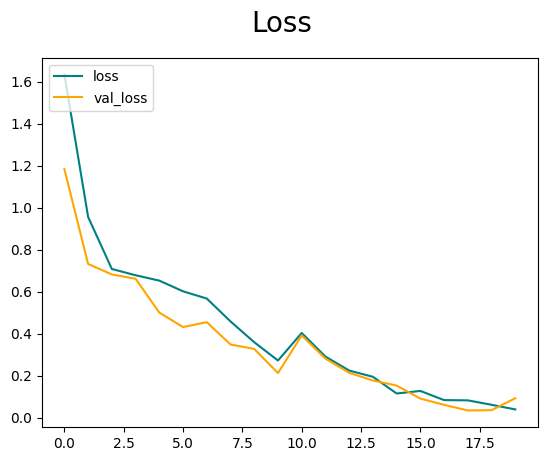

In [38]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()


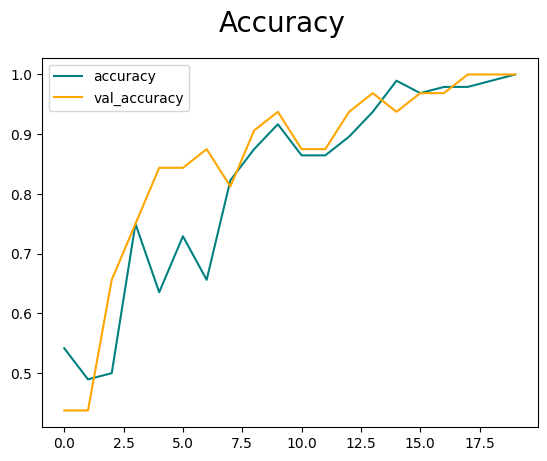

In [39]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()


In [40]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [41]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()


In [42]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [43]:
print(pre.result(), re.result(), acc.result())


tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


In [44]:
import cv2


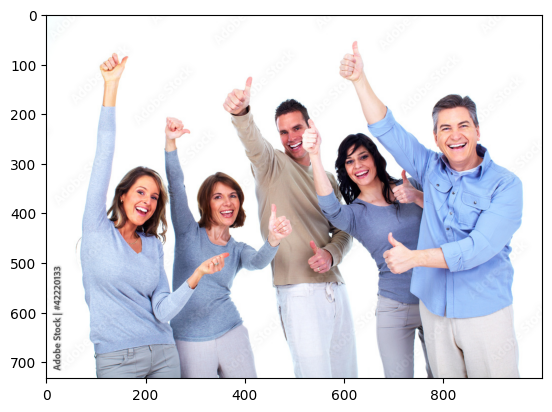

In [62]:
img = cv2.imread('/content/drive/MyDrive/image classification/data/happy/1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg')
plt.imshow (cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

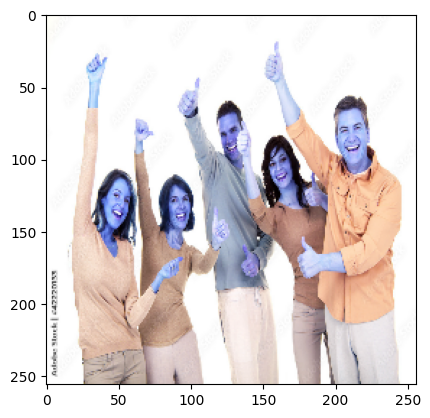

In [63]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()


In [64]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 42ms/step


In [65]:
yhat

array([[0.06656475]], dtype=float32)

In [66]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')


Predicted class is Happy


In [72]:
from tensorflow.keras.models import load_model
model.save(os.path.join('/content/drive/MyDrive/image classification/models','imageclassifier.h5'))
new_model = load_model('/content/drive/MyDrive/image classification/models/imageclassifier.h5')
new_model.predict(np.expand_dims(resize/255, 0))


1/1 [==============================] - 0s 215ms/step


array([[0.06656475]], dtype=float32)